# Project: Investigate a Dataset :No-Show Appoinments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● "AppointmentDay" tells us on what day the patient should go to the appointment.

● "Age" indicates the age of each patient.

● "Hipertension" indicates whether or not the patient has Hipertension disease

● "Diabetes" indicates whether or not the patient has Diabetes disease

● "Alcoholism" indicates whether or not the patient has Alcoholism disease

● "Handcap" indicates whether or not the patient has Handcap disease

### Research Question 1 :is the appointmentday affect the number of patians will show ?

### Research Question 2 :What is the relation between age and chronic diseases and what is the probability they will show ?

### Research Question 3  :what is the probipilaty of people didnit get a sms will not show?

In [1]:
# this cell to set up import statements for all of the packages 
#  I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the data of no-show appiontment and print out the head of the dataframe
data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
data.head()
# change the names of the columns to lowercase to be more flexible

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# get the types of columns and shape of the dataframe
# check Null values
data.info()
# some of columns type need to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# get the number of unique values in each column
data.nunique()
# there is duplicates in patientId column 
# handcap column is boolan should has only 2 unique values

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
# check the duplicates in patientId an no-show togther
data.duplicated(subset = ['PatientId','No-show']).sum()
# to keep only one observation that has the no-show value

38710

In [6]:
# get the statistics of Age column
data['Age'].describe()
# to see if there is incorrect values

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### Data Cleaning

1-Edit columns names

2-Drop duplicates

3-Drop rows have incorrect values in 'age' and 'handcap' columns

4-Convert the data type of columns to the correct datatype

In [7]:
# get a copy of dataframe to preform clean on it 
data_clean = data
# print some lines to get sure data is copied
data_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# convert the names of the columns to be lowercase and replace (-) with (_)
data_clean.rename(columns=lambda x: x.lower().replace("-","_"),inplace = True)
# get sure the names of columns changed
data_clean.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# get a subset of duplicated data in 'patientid' and 'no_show columns
dup = data_clean.duplicated(subset = ['patientid','no_show'])
# select only rows without duplicates in dataframe
data_clean = data_clean[~dup]
# get sure there's no duplicates in the new dataframe
data_clean.duplicated(subset = ['patientid','no_show']).sum()

0

In [10]:
# get subset of duplicated data in 'patientid' and data in 'no_show' that equal yes 
# to keep only one observation of patient come in one appointment
dup_2 = data_clean.duplicated(subset = ['patientid']) & (data['no_show']=='Yes')
# select only rows without duplicates in dataframe and attended one appiontment at less
data_clean = data_clean[~dup_2]
# check if there's still duplicates in 'patientid' column
data_clean.duplicated(subset = ['patientid']).sum()

<ipython-input-10-65021bc55109>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clean = data_clean[~dup_2]


4048

In [11]:
# the remaining rows with duplicates the people has never shown
# drop duplicates in 'patientid' column
data_clean.drop_duplicates(subset=['patientid'],inplace=True)
#get sure there's no duplicates in the new dataframe
data_clean.duplicated(subset = ['patientid']).sum()

0

In [12]:
# replace the value of (age) '-1' by '1'
data_clean.loc[data_clean['age']<0,'age']=1
# replace the values of (handcap) greater than 1 by '0'
data_clean.loc[data_clean['handcap']>1,'handcap']=0
#cheak the age value less than 0
print((data_clean['age'] < 0).sum())
#cheak the handcap values greater than 1
sum(data_clean['handcap'] > 1)

0


0

In [13]:
#convert the data type of 'patientid' and 'appointmentid' to str
data_clean['patientid']=data_clean['patientid'].astype('str')
data_clean['appointmentid']=data_clean['appointmentid'].astype('str')
#convert the data type of 'scheduledday' and 'appointmentday' to datetime and format it (by day-month-year)
data_clean['scheduledday']=pd.to_datetime(data_clean['scheduledday'],format = "%Y-%m-%d")
data_clean['appointmentday']=pd.to_datetime(data_clean['appointmentday'],format = "%Y-%m-%d")
#convert the data type of scholarship','hipertension','diabetes','alcoholism','handcap' and 'sms_received to boolean
for col in data_clean.iloc[:,7:13]:
    data_clean[col] = data_clean[col].astype('bool')

In [14]:
#check the data types of the columns
data_clean.dtypes

patientid                      object
appointmentid                  object
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                      bool
hipertension                     bool
diabetes                         bool
alcoholism                       bool
handcap                          bool
sms_received                     bool
no_show                        object
dtype: object

## Exploratory Data Analysis


### Research Question 1 :is the appointmentday affect the number of patians will show ?

##### the figure shows the first days have high patians come more than last days ,we can see almost 500 patians will not show in the first days and the last days it decrease to almost 250 ,as the proportions of all patians come decreased 

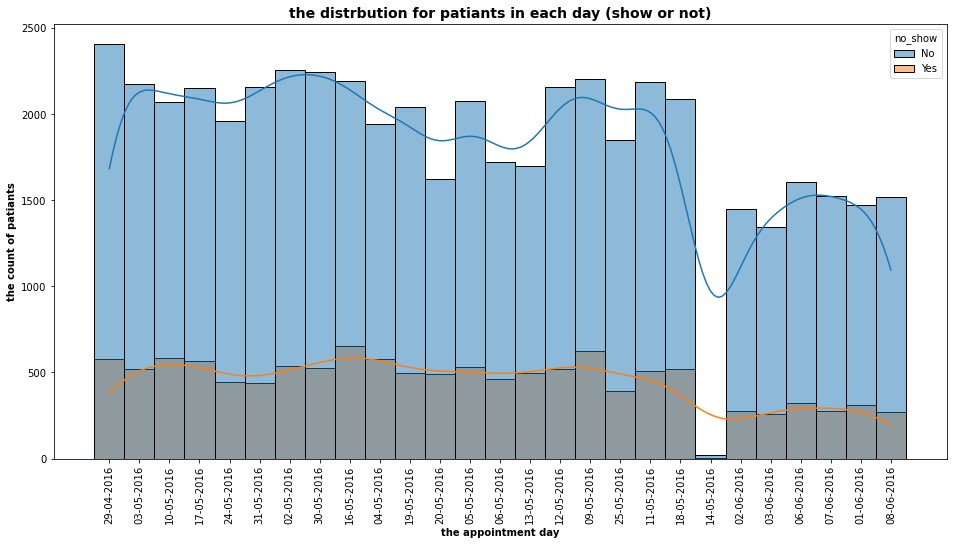

In [15]:
# set the hight and width of figure
plt.figure(figsize=(16,8))
# plot a histgram to see the distrbution of each day of appointment repreasnt as (day-month-year)format
sns.histplot(data=data_clean,x=data_clean['appointmentday'].dt.strftime("%d-%m-%Y"),hue='no_show',kde=True)
# set the title name 
plt.title("the distrbution for patiants in each day (show or not)",fontsize=14,weight='bold')
# set the xlabel name
plt.xlabel("the appointment day",fontsize=10,weight='bold')
#set the ylabel name 
plt.ylabel("the count of patiants",fontsize=10,weight='bold')
# rotate the xvalues (appointmentday) to be 90 degree
plt.xticks(rotation = 90)
# show the plot
plt.show()

### Research Question 2 :What is the relation between age and chronic diseases and what is the probability they will show ?

In [16]:
# group age to the nearst of (multiply 10) to repreasnt as 12 catgory
data_clean['age_group']=((data_clean['age']//10)*10).astype('int')
# get the count of each year group in ascending order
data_clean['age_group'].value_counts().sort_index()

0      10595
10      7414
20      7606
30      8151
40      7652
50      8701
60      6712
70      3500
80      1722
90       239
100        5
110        2
Name: age_group, dtype: int64

In [17]:
# repreasnt no_show column by intger values to get the proportions for each group
data_clean['no_show_int'] = data_clean['no_show'].map({'No':0,'Yes':1})

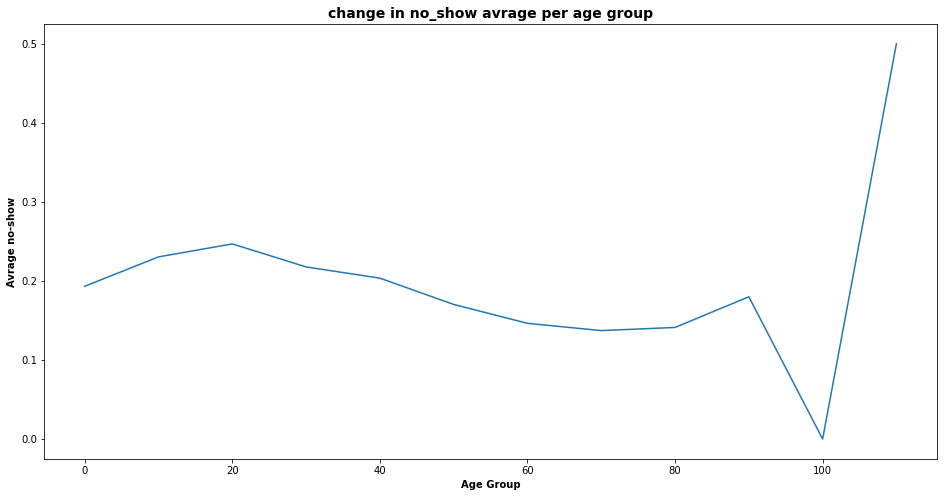

In [18]:
# set the width and hight of the figure
plt.figure(figsize=(16,8))
# create line plot to see changing in avrage no-show for each age-group
sns.lineplot(data=data_clean.groupby(['age_group'],as_index=False)['no_show_int'].mean(),x='age_group',y='no_show_int')
# set the title of the plot
plt.title("change in no_show avrage per age group",fontsize=14,weight='bold')
# set xlabel name 
plt.xlabel("Age Group",fontsize=10,weight='bold')
# set ylabel name
plt.ylabel("Avrage no-show",fontsize=10,weight='bold')
# show the plot
plt.show()

In [19]:
# write a funcation that provide bar plot 
def mybarplot(df,x_var,y_var,hue_var=None):
    """bar plot to see the avrage diffrance with each group
    
    Args:
       (df):the data frame that contain the data will be plotted
       (x_var):the column of data want to see the diffrance in it's varibale
       (y_var):the avrage of column data respect to (x_var)
       (hue_var):to split (x_var) respect to another column of data(optional)
       
    return:
        A visualization explore the avrage of varible respect to another varible in the data frame 
    
    """
    # set the hight and width of figure
    plt.figure(figsize=[14,8])
    # bar plot set args to visulaze it
    sns.barplot(data=df,x=x_var,y=y_var,hue=hue_var,edgecolor='black')
    # if hue varible provided give it's name else define it as clear
    if hue_var:
        huelabel = f" & {hue_var}"
    else:
        huelabel = ""
    # set the title of the plot respect to it's variable    
    plt.title(f'Avrage {y_var} by {x_var}{huelabel}'.title(),fontsize=14,weight='bold')
    # set the x label name 
    plt.xlabel(x_var.title(),fontsize=10,weight='bold')
    # set  the y label name 
    plt.ylabel(f'Avrage {y_var}'.title(),fontsize=10,weight='bold')
     

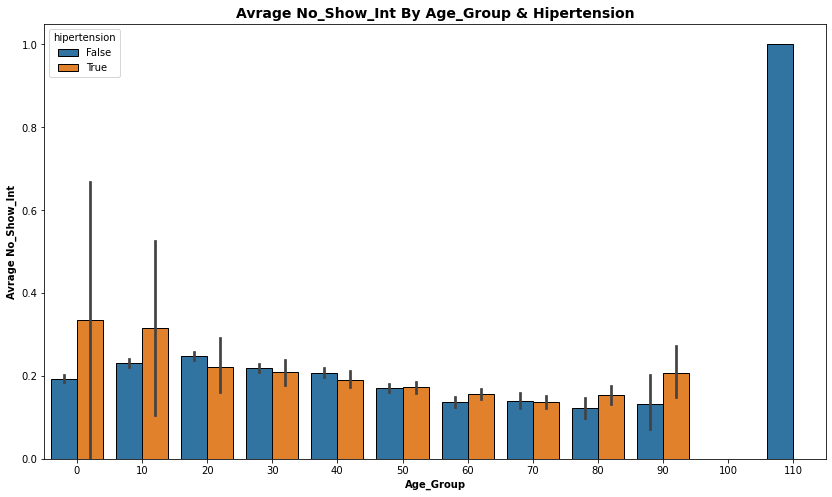

In [20]:
# bar plot show the avrage show of people has hipertension 
mybarplot(data_clean,'age_group','no_show_int',hue_var='hipertension')
plt.show()

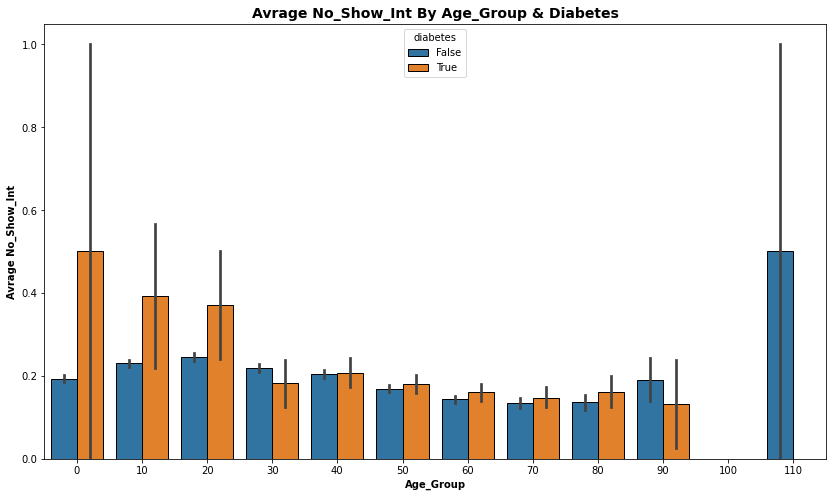

In [21]:
# bar plot show the avrage show of people has diabetes
mybarplot(data_clean,'age_group','no_show_int',hue_var='diabetes')
plt.show()

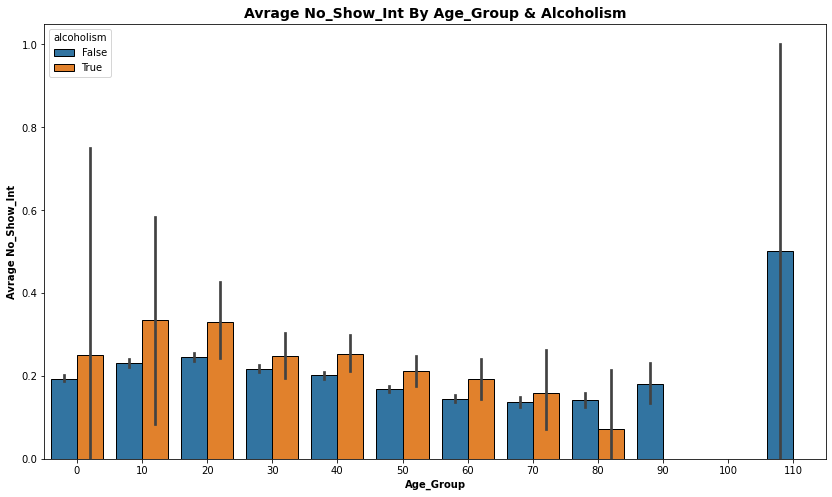

In [22]:
# bar plot show the avrage show of people has alcoholic
mybarplot(data_clean,'age_group','no_show_int',hue_var='alcoholism')
plt.show()

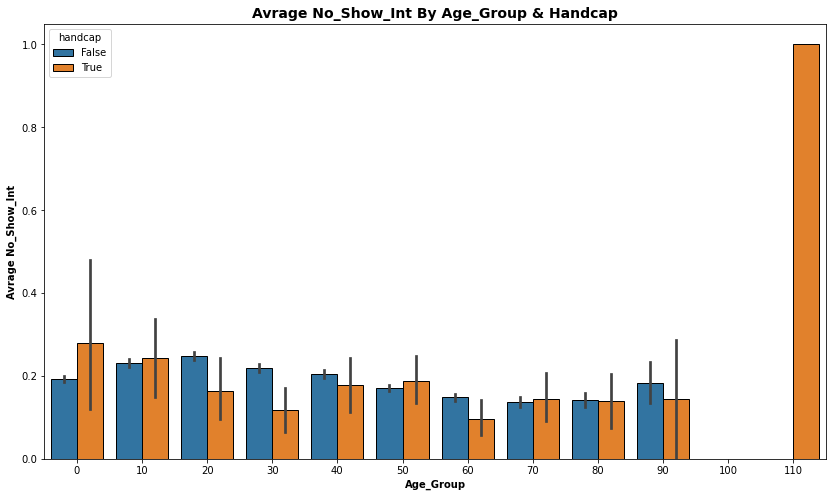

In [23]:
# bar plot show the avrage show of people has handcap 
mybarplot(data_clean,'age_group','no_show_int',hue_var='handcap')
plt.show()

### Research Question 3  :what is the probipilaty of people didnit get a sms will not show?

the data below show more than 80% people will show and the precantge of people don't get sms message will show is 80% ,people get sms message is 62% will show

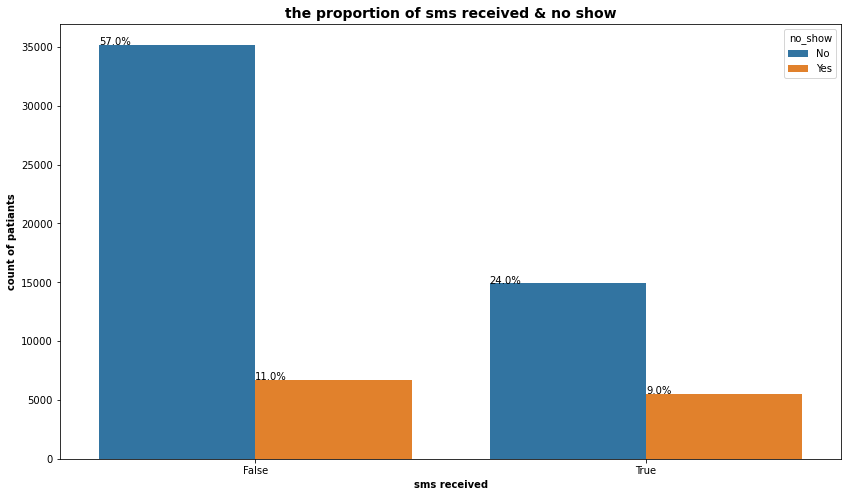

In [24]:
# bar plot show the proportions of patians get sms and show and vice versa
# set the hight and width of figure
plt.figure(figsize=[14,8]) 
# count plot to count the values of each catgory
ax1=sns.countplot(data = data_clean,x = 'sms_received',hue='no_show')
# loop to set the probability upper each observation
for p in ax1.patches:
    txt = str((p.get_height()/len(data_clean)*100).round()) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

# set the name of the figure    
plt.title("the proportion of sms received & no show",fontsize=14,weight='bold')
#set the xlabel name
plt.xlabel("sms received",fontsize=10,weight='bold')
#set the ylabel name
plt.ylabel("count of patiants",fontsize=10,weight='bold')    
#show the plot
plt.show()

<a id='conclusions'></a>
## Conclusions

After prefomring data wrangling and data cleaning,the vaisulazions represnts alot of information that can be used to predict if paitant will be show or not first we see the distrbution of people come evreyday and see almost 500 patians will not show in the first days and the last days it decrease to almost 250 ,as the proportions of all patians come decreased so now we predicted number of patians wont show ,continue to visulize the relation betwwen age and chronic diseases the avrage proportions of no_show column to each group of ages and the diffrance between if they have chronic diseases or not ,the last visulaziton to taik about is what is the probipilaty of people didnit get a sms will not show? after getting the proportion of each observation ,prdouce the Conclusion of the precantge of people don't get sms message will show is 80% ,people get sms message is 62% will show.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295